In [67]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [78]:
#Importing the data
data = pd.read_excel('C:/Users/kirubel/Documents/PhD Projects/Review 1/Data/AGREE Evaluation aggregate.xlsx')

In [69]:
#See the table
data


,Guideline,D1-Scope and Purpose,D2- Stakeholder Involvement,D3- Rigour of Development,D4- Clarity of Presentation,D5- Applicability,D6- Editorial Independence
0,TRIPOD,88.9,70.8,70.3,70.8,47.91,97.91
1,SPIRIT-AI extension,87.5,83.3,76.0,72.2,70.83,85.41
2,MG,73.6,40.3,53.1,56.9,36.45,75.01
3,CONSORT-AI extension,91.6,84.7,75.5,81.9,63.54,97.91
4,GDRMPM,68.1,56.9,35.4,43.1,26.04,77.08
5,STARD 2015,90.3,72.2,66.2,70.8,61.45,93.75
6,DECIDE-AI,93.3,90.3,79.2,83.3,70.83,97.91
7,MI-CLAIM,91.7,44.4,31.3,75.0,44.79,85.42
8,CLEAR,93.1,69.4,68.2,76.4,80.21,87.51
9,TRIPOD-AI,84.7,93.1,79.5,75.0,73.60,91.70


In [70]:
#Conver the table to dataframe
df = pd.DataFrame(data)

In [71]:
#Scan the columns
print(df.columns)

Index(['Guideline', 'D1-Scope and Purpose', 'D2- Stakeholder Involvement',
       'D3- Rigour of Development', 'D4- Clarity of Presentation',
       'D5- Applicability', 'D6- Editorial Independence'],
      dtype='object')


In [72]:
# Set 'Guideline' as the index
df.set_index('Guideline', inplace=True)


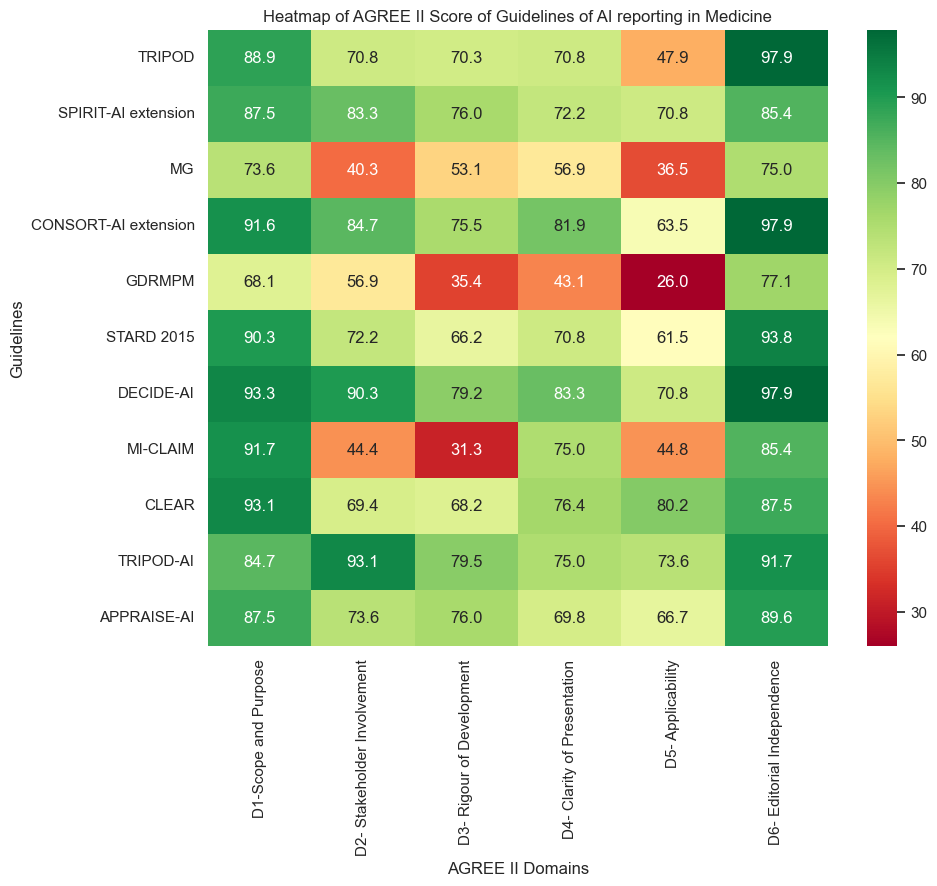

In [73]:
#Plot the aggregate score of the guidelines scaled percentage value 
plt.figure(figsize=(10, 8))
sns.heatmap(data=df, cmap='RdYlGn', annot=True, fmt='.1f', cbar=True)
plt.xlabel('AGREE II Domains')
plt.ylabel('Guidelines')
plt.title('Heatmap of AGREE II Score of Guidelines of AI reporting in Medicine')
plt.show()

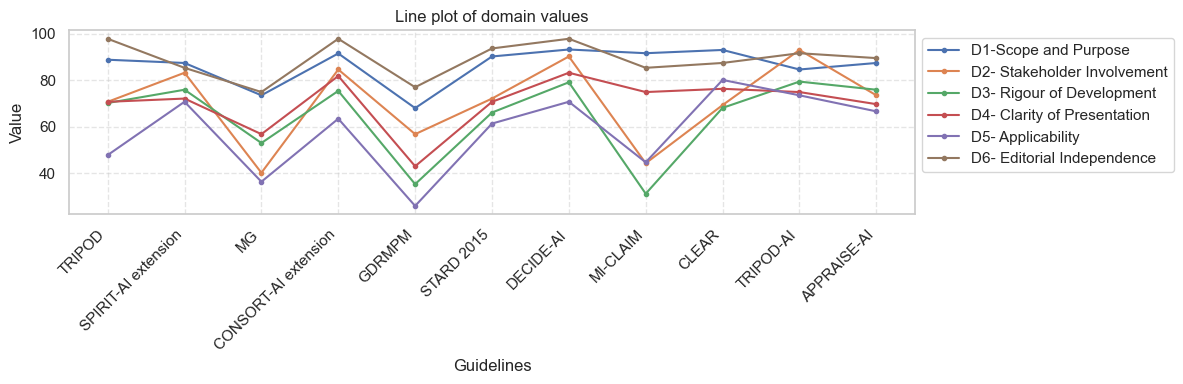

In [74]:

#Plot the Line plot to see the variablity of score across guidelines
plt.figure(figsize=(12, 4))

# Loop through each criterion column and create a line plot
for column in data.columns[1:]:
    plt.plot(data['Guideline'], data[column], marker='.', label=column)

plt.xlabel('Guidelines')
plt.ylabel('Value')
plt.title('Line plot of domain values')
plt.legend(loc='best', bbox_to_anchor=(1,1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

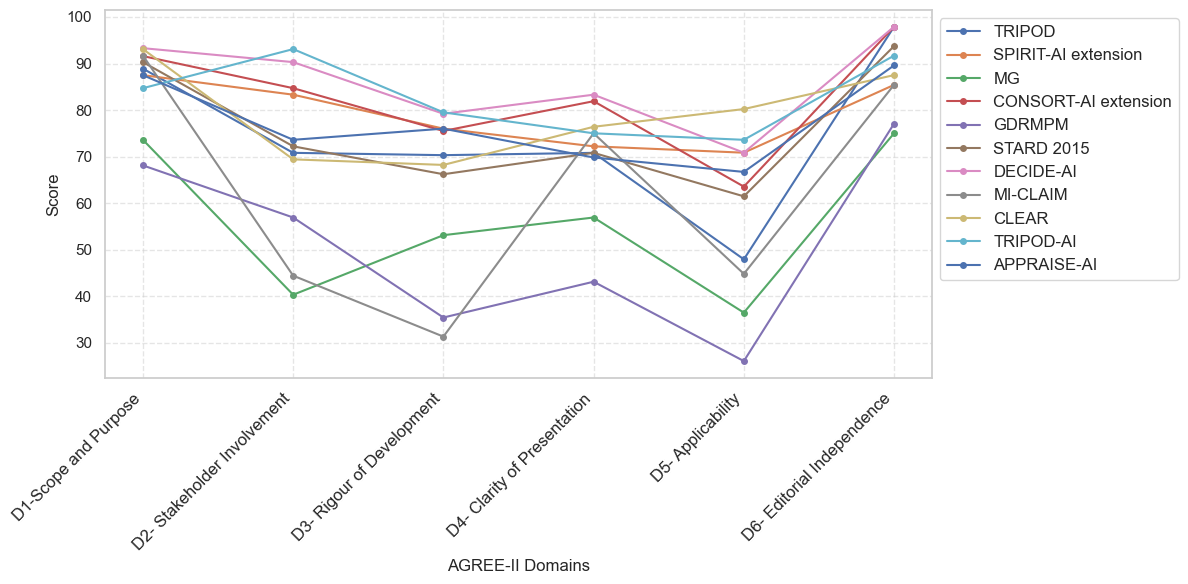

In [75]:


plt.figure(figsize=(12, 6))

# Loop through each guideline and create a line plot for each
for index, guideline in enumerate(data['Guideline']):
    plt.plot(data.columns[1:], data.iloc[index, 1:], marker='.', markersize=8, label=guideline)

# Add labels and title
plt.xlabel('AGREE-II Domains', fontsize=12)
plt.ylabel('Score', fontsize=12)
#plt.title('Line Plot of Guidelines Across AGREE-II Domains', fontsize=16)

# Improve legend
plt.legend(loc='best', bbox_to_anchor=(1, 1), fontsize=12)

# Improve x-ticks
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()

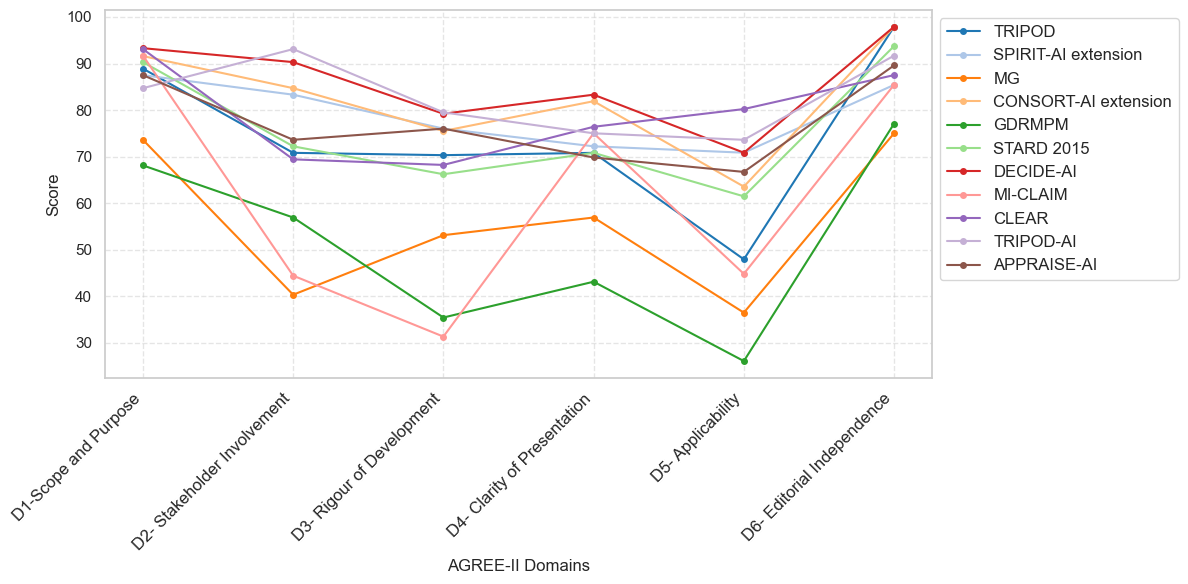

In [76]:
import matplotlib.cm as cm
# Create a figure
plt.figure(figsize=(12, 6))

# Generate a colormap with distinct colors
num_guidelines = len(data['Guideline'])
colors = cm.tab20.colors  # Choose a colormap (e.g., 'tab20' for up to 20 distinct colors)

# Loop through each guideline and create a line plot for each
for index, guideline in enumerate(data['Guideline']):
    plt.plot(data.columns[1:], data.iloc[index, 1:], marker='.', markersize=8, 
             color=colors[index % len(colors)], label=guideline)

# Add labels and title
plt.xlabel('AGREE-II Domains', fontsize=12)
plt.ylabel('Score', fontsize=12)

# Improve legend
plt.legend(loc='best', bbox_to_anchor=(1, 1), fontsize=12)

# Improve x-ticks
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()

In [79]:
#Alternative visualisation of the parallel line plot to comapre the scores across domains
# Convert categorical guideline names to numeric values
data['Guideline'] = pd.factorize(data['Guideline'])[0]

fig = go.Figure(data=go.Parcoords(
    line=dict(color=data['Guideline'],
              colorscale='rainbow',
              showscale=True,
              reversescale=True,
              colorbar=dict(title='Guideline')),
    dimensions=list([
        dict(range=[min(data[column]), max(data[column])],
             label=column,
             values=df[column])
        for column in data.columns[1:]
    ])
))

fig.show()

NameError: name 'go' is not defined

C:\Users\kirubel\AppData\Local\Temp\ipykernel_12684\508649488.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Criterion', y='Value', data=df_melted, inner='quartile', palette='Set3')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


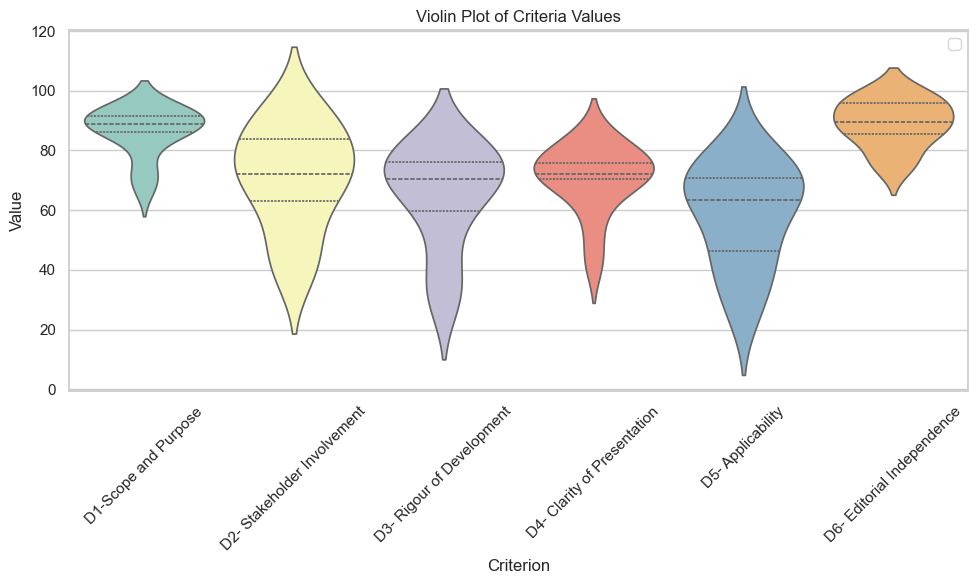

In [80]:
#Violin plot for the domains and interpretation as markdown
# Melt the DataFrame to long format
df_melted = data.melt(id_vars='Guideline', var_name='Criterion', value_name='Value')

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Criterion', y='Value', data=df_melted, inner='quartile', palette='Set3')
plt.xlabel('Criterion')
plt.ylabel('Value')
plt.title('Violin Plot of Criteria Values')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [81]:
#Plot a radar chart for better visualisation option
# Exclude the 'Guidelines' column for the radar chart
radar_data = data.drop('Guideline', axis=1)

fig = go.Figure()


NameError: name 'go' is not defined

In [82]:
# Add each guideline as a trace to the radar chart
for i in range(len(data)):
    fig.add_trace(go.Scatterpolar(
        r=radar_data.iloc[i].values,
        theta=radar_data.columns,
        fill='none',
        name=df['Guideline'][i]
    ))


AttributeError: 'Figure' object has no attribute 'add_trace'

In [83]:
# Update the layout of the radar chart
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 100]  # Set the range of the radial axis
        )
    ),
    showlegend=True,
    title='Radar Chart of Guidelines the AGREE II Criteria',
)

fig.show()

AttributeError: 'Figure' object has no attribute 'update_layout'

KeyError: 'Guideline'

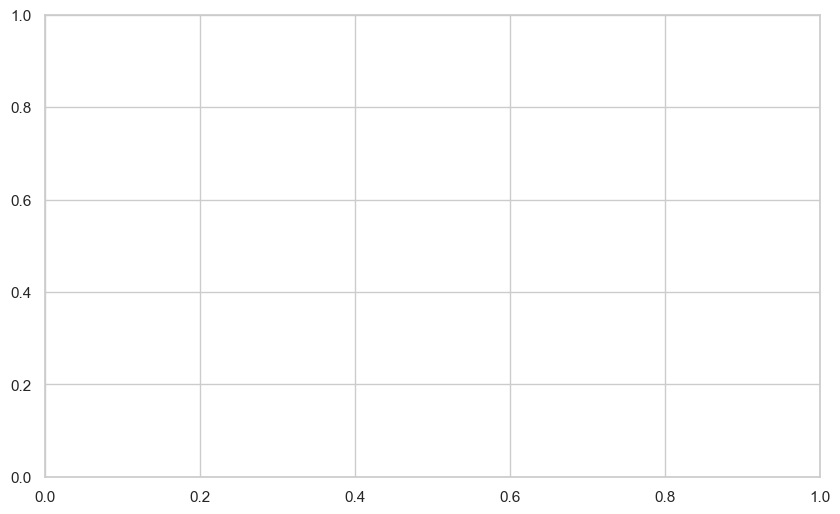

In [84]:
#Plot a bar graph of all the values
# Set the column names for the x-axis
criteria = df.columns[1:]

# Set the number of guidelines
num_guidelines = len(df)

# Create an array for the x-axis positions
x = np.arange(len(criteria))

# Set the width of each bar
bar_width = 0.15

# Set color palette for guidelines
colors = ['#E74C3C', '#3498DB', '#2ECC71', '#F39C12', '#9B59B6', '#1ABC9C', '#F1C40F', '#34495E', '#E67E22']

# Create the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(num_guidelines):
    ax.bar(x + (i - (num_guidelines-1)/2) * bar_width, df.iloc[i, 1:], width=bar_width, label=df['Guideline'][i], color=colors[i])

# Add labels, title, and legend
ax.set_xlabel('Criteria', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Grouped Bar Plot of Guidelines Criteria', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(criteria, rotation=45, fontsize=10)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize grid lines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add data labels
for i in range(num_guidelines):
    for j in range(len(criteria)):
        value = df.iloc[i, j+1]
        ax.text(x[j] + (i - (num_guidelines-1)/2) * bar_width, value + 2, f'{value:.1f}', ha='center', va='bottom', fontsize=9)

# Place the legend outside the plot
ax.legend(title='Guidelines', fontsize=10, bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()


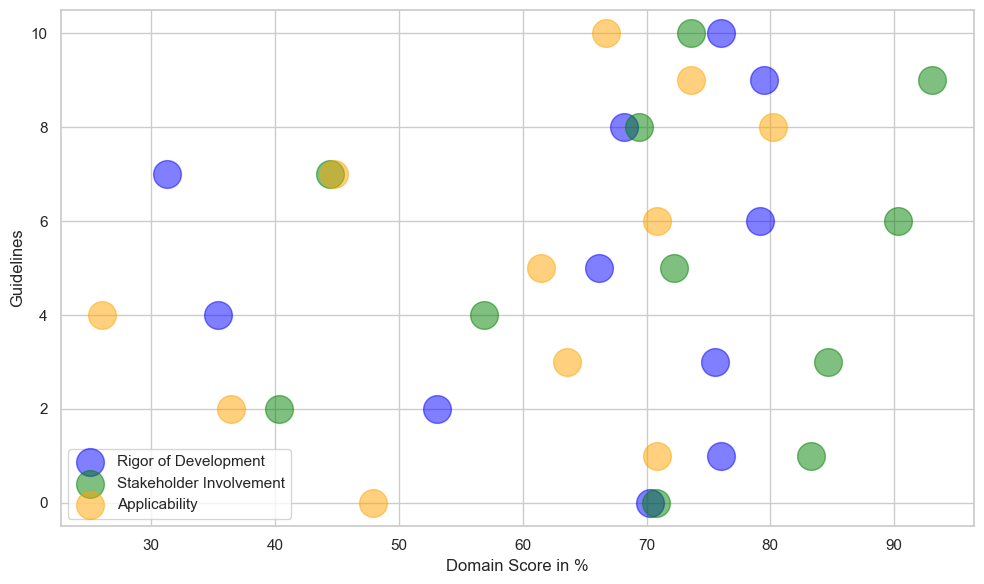

In [85]:

# Plot the scatter plot with bubble size for comarision across the main domains
plt.figure(figsize=(10, 6))

# Scatter plot for Rigor of Development
scatter_rd = plt.scatter(data['D3- Rigour of Development'], data['Guideline'], s=400, c='blue', alpha=0.5, label="Rigor of Development")

# Scatter plot for Stakeholder Involvement
scatter_si = plt.scatter(data['D2- Stakeholder Involvement'], data['Guideline'], s=400, c='green', alpha=0.5, label="Stakeholder Involvement")

# Scatter plot for Applicability
scatter_app = plt.scatter(data['D5- Applicability'], data['Guideline'], s=400, c='orange', alpha=0.5, label="Applicability")

# Set labels and title
plt.xlabel("Domain Score in %")
plt.ylabel("Guidelines")
#plt.title("Comparison of Domain Scores across Guidelines")
plt.legend(loc='lower left')
plt.tight_layout()

# Add grid
plt.grid(True)

# Show the plot
plt.show()


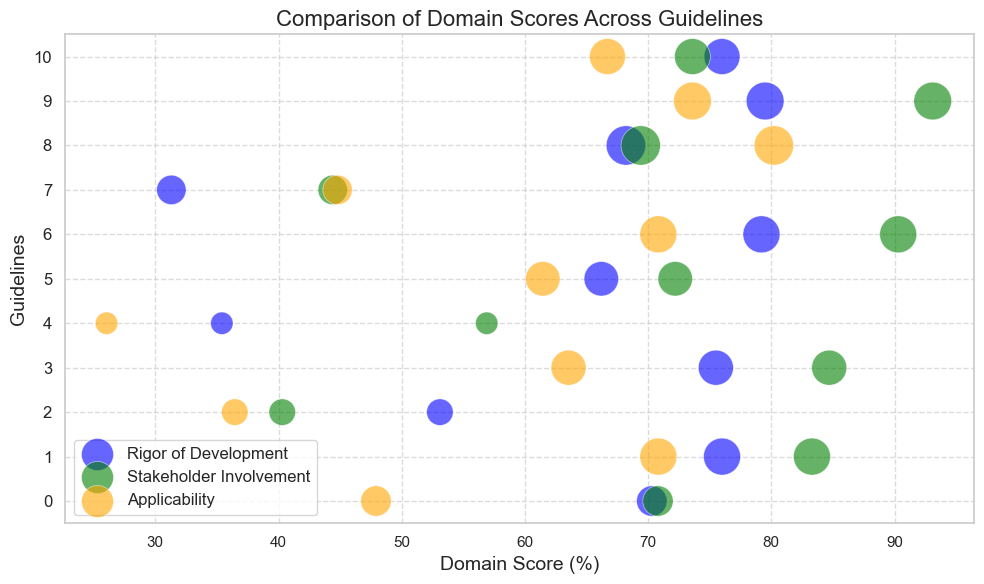

In [86]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# Scatter plot for Rigor of Development
plt.scatter(data['D3- Rigour of Development'], data['Guideline'], 
            s=data['D5- Applicability']*10, c='blue', alpha=0.6, 
            edgecolor='w', linewidth=0.5, label="Rigor of Development")

# Scatter plot for Stakeholder Involvement
plt.scatter(data['D2- Stakeholder Involvement'], data['Guideline'], 
            s=data['D5- Applicability']*10, c='green', alpha=0.6, 
            edgecolor='w', linewidth=0.5, label="Stakeholder Involvement")

# Scatter plot for Applicability
plt.scatter(data['D5- Applicability'], data['Guideline'], 
            s=data['D5- Applicability']*10, c='orange', alpha=0.6, 
            edgecolor='w', linewidth=0.5, label="Applicability")

# Set labels and title
plt.xlabel("Domain Score (%)", fontsize=14)
plt.ylabel("Guidelines", fontsize=14)
plt.title("Comparison of Domain Scores Across Guidelines", fontsize=16)

# Set y-ticks to the list of guidelines
plt.yticks(data['Guideline'], fontsize=12)

# Improve legend
plt.legend(loc='lower left', fontsize=12)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()

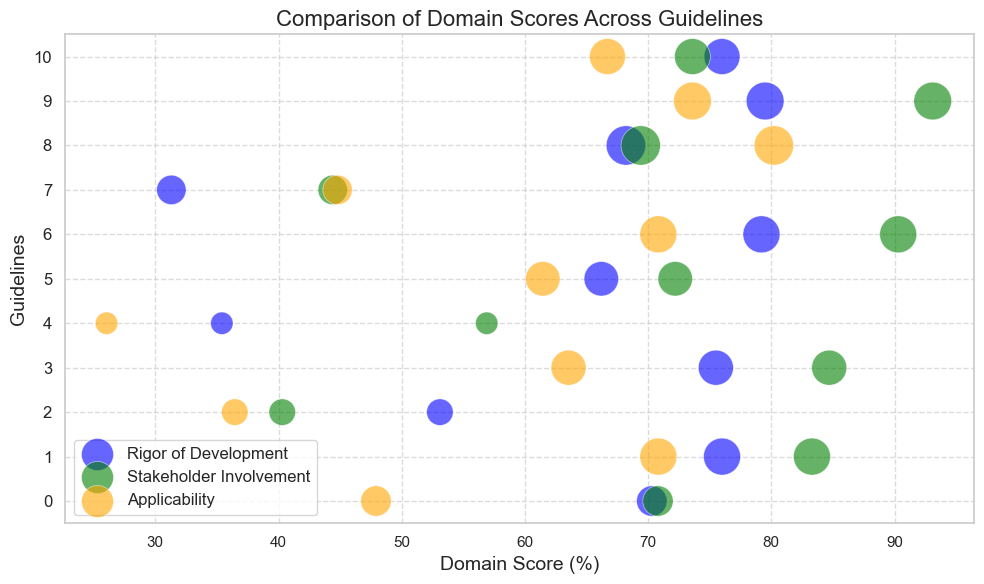

In [87]:
# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# Scatter plot for Rigor of Development
plt.scatter(data['D3- Rigour of Development'], data['Guideline'], 
            s=data['D5- Applicability']*10, c='blue', alpha=0.6, 
            edgecolor='w', linewidth=0.5, label="Rigor of Development")

# Scatter plot for Stakeholder Involvement
plt.scatter(data['D2- Stakeholder Involvement'], data['Guideline'], 
            s=data['D5- Applicability']*10, c='green', alpha=0.6, 
            edgecolor='w', linewidth=0.5, label="Stakeholder Involvement")

# Scatter plot for Applicability
plt.scatter(data['D5- Applicability'], data['Guideline'], 
            s=data['D5- Applicability']*10, c='orange', alpha=0.6, 
            edgecolor='w', linewidth=0.5, label="Applicability")

# Set labels and title
plt.xlabel("Domain Score (%)", fontsize=14)
plt.ylabel("Guidelines", fontsize=14)
plt.title("Comparison of Domain Scores Across Guidelines", fontsize=16)

# Set y-ticks to the list of guidelines with labels
plt.yticks(ticks=range(len(data['Guideline'])), labels=data['Guideline'], fontsize=12)

# Improve legend
plt.legend(loc='lower left', fontsize=12)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()